# WeatherPy

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime as dt
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# Align text to the left
def left_align(df):
    left_aligned_df = df.style.set_properties(**{'text-align': 'left'}).set_table_styles(
        [ dict(selector='th', props=[('text-align', 'left')] ) ])
    
    return left_aligned_df

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
# len(cities)
cities

['norman wells',
 'tonder',
 'kismayo',
 'wolmaranstad',
 'yellowknife',
 'chaah',
 'segovia',
 'riyadh',
 'petropavlovsk-kamchatskiy',
 'bogense',
 'broome',
 'serenje',
 'constitucion',
 'ostrovnoy',
 'shelburne',
 'dores do indaia',
 'illoqqortoormiut',
 'tautira',
 'klaksvik',
 'bluff',
 'husavik',
 'marcona',
 'jamestown',
 'kapaa',
 'cochrane',
 'lagoa',
 'geraldton',
 'hermanus',
 'cape town',
 'bonavista',
 'alta floresta',
 'qaanaaq',
 'bolungarvik',
 'barrow',
 'georgetown',
 'saint-philippe',
 'bougouni',
 'rikitea',
 'aginskoye',
 'westport',
 'veseloyarsk',
 'chuy',
 'zlatoust',
 'guliston',
 'carnarvon',
 'hami',
 'mago',
 'kodiak',
 'ushuaia',
 'warqla',
 'vaitupu',
 'brae',
 'busselton',
 'bac lieu',
 'urucara',
 'new norfolk',
 'nikolskoye',
 'te anau',
 'necochea',
 'bambous virieux',
 'bengkulu',
 'mataura',
 'tura',
 'dikson',
 'lata',
 'taltal',
 'borgarnes',
 'davila',
 'abu dhabi',
 'solnechnyy',
 'khatanga',
 'vao',
 'ilulissat',
 'vallenar',
 'labuhan',
 'port 

### Perform API Calls

In [4]:
url = 'http://api.openweathermap.org/data/2.5/weather?'
temp_unit = 'imperial'
citynumb = 1
setnumb = 1
city_n = []
lat = []
lng = []
max_temp = []
humidity = []
cloud = []
wind_speed = []
country = []
date_w = []

for city in cities:
    url_query = (f"{url}appid={weather_api_key}&q={city}&units={temp_unit}")
    weather_response = requests.get(url_query)
    weather_json = weather_response.json()
    
    try:
        lat.append(weather_json['coord']['lat'])
        lng.append(weather_json['coord']['lon'])
        max_temp.append(weather_json['main']['temp_max'])
        humidity.append(weather_json['main']['humidity'])
        cloud.append(weather_json['clouds']['all'])
        wind_speed.append(weather_json['wind']['speed'])
        country.append(weather_json['sys']['country'])
        date_w.append(weather_json['dt'])
        city_n.append(city)
        print(f"Processing Record {citynumb} of Set {setnumb} | {city}")
        citynumb += 1
        
        if citynumb == 50:
            setnumb += 1 
            citynumb = 1
    except:
        print('City' + '\033[1m' + ' not ' + '\033[0m' + 'found. Skipping...')

Processing Record 1 of Set 1 | norman wells
Processing Record 2 of Set 1 | tonder
Processing Record 3 of Set 1 | kismayo
City not found. Skipping...
Processing Record 4 of Set 1 | yellowknife
Processing Record 5 of Set 1 | chaah
Processing Record 6 of Set 1 | segovia
Processing Record 7 of Set 1 | riyadh
Processing Record 8 of Set 1 | petropavlovsk-kamchatskiy
Processing Record 9 of Set 1 | bogense
Processing Record 10 of Set 1 | broome
Processing Record 11 of Set 1 | serenje
Processing Record 12 of Set 1 | constitucion
Processing Record 13 of Set 1 | ostrovnoy
Processing Record 14 of Set 1 | shelburne
Processing Record 15 of Set 1 | dores do indaia
City not found. Skipping...
Processing Record 16 of Set 1 | tautira
Processing Record 17 of Set 1 | klaksvik
Processing Record 18 of Set 1 | bluff
Processing Record 19 of Set 1 | husavik
City not found. Skipping...
Processing Record 20 of Set 1 | jamestown
Processing Record 21 of Set 1 | kapaa
Processing Record 22 of Set 1 | cochrane
Proces

Processing Record 39 of Set 4 | moroni
Processing Record 40 of Set 4 | vestmannaeyjar
Processing Record 41 of Set 4 | grand gaube
Processing Record 42 of Set 4 | port augusta
Processing Record 43 of Set 4 | gilbues
Processing Record 44 of Set 4 | nanortalik
Processing Record 45 of Set 4 | nemetker
Processing Record 46 of Set 4 | olafsvik
Processing Record 47 of Set 4 | mezhdurechensk
Processing Record 48 of Set 4 | breytovo
Processing Record 49 of Set 4 | marang
Processing Record 1 of Set 5 | cao bang
Processing Record 2 of Set 5 | mbini
Processing Record 3 of Set 5 | paso de patria
City not found. Skipping...
Processing Record 4 of Set 5 | olga
Processing Record 5 of Set 5 | san policarpo
Processing Record 6 of Set 5 | qiongshan
Processing Record 7 of Set 5 | lompoc
Processing Record 8 of Set 5 | bahawalpur
Processing Record 9 of Set 5 | tirana
City not found. Skipping...
Processing Record 10 of Set 5 | jiehu
Processing Record 11 of Set 5 | bredasdorp
Processing Record 12 of Set 5 | p

Processing Record 22 of Set 8 | ambon
Processing Record 23 of Set 8 | belgrade
Processing Record 24 of Set 8 | belaya gora
Processing Record 25 of Set 8 | baoro
Processing Record 26 of Set 8 | banda aceh
Processing Record 27 of Set 8 | shache
Processing Record 28 of Set 8 | acaponeta
Processing Record 29 of Set 8 | manzhouli
Processing Record 30 of Set 8 | tinalmud
Processing Record 31 of Set 8 | nemuro
Processing Record 32 of Set 8 | turukhansk
Processing Record 33 of Set 8 | imbituba
Processing Record 34 of Set 8 | ziarat
Processing Record 35 of Set 8 | amot
Processing Record 36 of Set 8 | palm beach gardens
Processing Record 37 of Set 8 | puro
Processing Record 38 of Set 8 | berlevag
Processing Record 39 of Set 8 | santa vitoria do palmar
Processing Record 40 of Set 8 | tapes
Processing Record 41 of Set 8 | hayden
Processing Record 42 of Set 8 | atlantic city
Processing Record 43 of Set 8 | myskhako
Processing Record 44 of Set 8 | verkh-usugli
Processing Record 45 of Set 8 | san qui

Processing Record 10 of Set 12 | manta
Processing Record 11 of Set 12 | xacmaz
Processing Record 12 of Set 12 | les cayes
Processing Record 13 of Set 12 | ahuimanu
Processing Record 14 of Set 12 | karasburg
Processing Record 15 of Set 12 | santa clara
Processing Record 16 of Set 12 | obihiro
Processing Record 17 of Set 12 | lavrentiya
Processing Record 18 of Set 12 | la possession
Processing Record 19 of Set 12 | chapais
Processing Record 20 of Set 12 | mayskiy
Processing Record 21 of Set 12 | onega
Processing Record 22 of Set 12 | xining
Processing Record 23 of Set 12 | gorele
Processing Record 24 of Set 12 | narsaq
Processing Record 25 of Set 12 | yanliang
Processing Record 26 of Set 12 | tame
Processing Record 27 of Set 12 | mwene-ditu
Processing Record 28 of Set 12 | udachnyy
Processing Record 29 of Set 12 | kaoma


### Convert Raw Data to DataFrame

In [5]:
# Create DataFrame with extracted data.
cities_df = pd.DataFrame({'City':city_n, 'Latitude':lat, 'Longitude':lng, 'Max Temp (F)':max_temp, 'Humidity (%)':humidity,
                          'Cloudiness (%)':cloud, 'Wind Speed (mph)':wind_speed, 'Country':country, 'Date':date_w})
cities_df['City'] = cities_df['City'].str.capitalize()
left_align(cities_df.head(20))

,City,Latitude,Longitude,Max Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Country,Date
0,Norman wells,65.282000,-126.832900,-14.800000,76,20,11.500000,CA,1613017360
1,Tonder,54.933100,8.866700,19.990000,87,7,7.760000,DK,1613017360
2,Kismayo,-0.358200,42.545400,77.160000,81,80,16.200000,SO,1613017360
3,Yellowknife,62.456000,-114.352500,-18.000000,83,40,5.750000,CA,1613017280
4,Chaah,2.249000,103.048000,88.930000,54,10,4.250000,MY,1613017361
5,Segovia,41.166700,-4.000000,45.000000,75,100,9.440000,ES,1613017361
6,Riyadh,24.687700,46.721900,53.600000,35,0,3.200000,SA,1613017361
7,Petropavlovsk-kamchatskiy,53.045200,158.648300,33.800000,64,40,13.420000,RU,1613017361
8,Bogense,55.566900,10.088600,19.990000,88,95,8.010000,DK,1613017361
9,Broome,42.250600,-75.833000,21.990000,49,90,3.440000,US,1613017067


### Export Data Frame in a csv file

In [6]:
cities_df.to_csv(output_data_file, index=False, header=True)

## Filtered Data based on Humidity percentage exceeding 100%

In [7]:
clean_cities_df = cities_df[(cities_df['Humidity (%)'] <= 100)]

if cities_df['City'].count() == clean_cities_df['City'].count():
    print('No cities found where humidity level exceeded 100%')
else:
    print('Some cities where humidity level were found and removed from Data Frame')

No cities found where humidity level exceeded 100%


## Plotting the Data

In [8]:
# Built-in function to create scatter plots
def scatter_only(x_axis, y_axis):
    # First argument is x axis and second is y axis.
    
    # Import today's date
    today = dt.datetime.today().strftime('%m/%d/%Y')
    
    # Scatter Plot
    plt.scatter(x_axis, y_axis, marker="o", facecolors='red', edgecolors="black")
    title = f"{y_axis.name} vs. {x_axis.name} Plot ({today})"
    fig_title = (f"{y_axis.name} vs. {x_axis.name} Plot" + '.png')
    plt.title(title)
    plt.xlabel(x_axis.name)
    plt.ylabel(y_axis.name)
    
    #Save image in output_data directory
    plt.savefig(f"../output_data/{fig_title}", bbox_inches = 'tight')

## Latitude vs. Temperature Plot

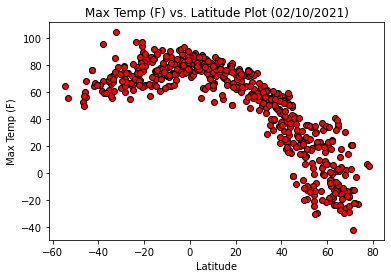

In [9]:
scatter_only(clean_cities_df['Latitude'], clean_cities_df['Max Temp (F)'])

#### This Latitude vs Temperature plot indicates that as we move away from the equator towards the northern hemisphere temperatures start to get colder.

## Latitude vs. Humidity Plot

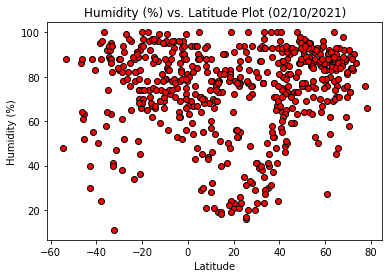

In [10]:
scatter_only(clean_cities_df['Latitude'], clean_cities_df['Humidity (%)'])

#### This Latitude vs Humidity plot indicates that a large group of places regardless of location are going to experience a humidity level over 60%.

## Latitude vs. Cloudiness Plot

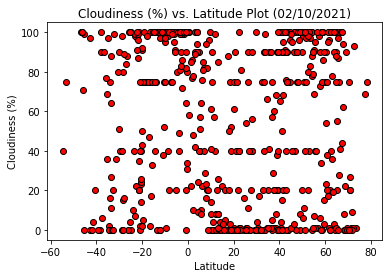

In [11]:
scatter_only(clean_cities_df['Latitude'], clean_cities_df['Cloudiness (%)'])

#### This Latitude vs Cloudiness plot indicates that eventhough there is an evenly distributed data, you can find a considerable group of locations that are going to experience either 0% or 100% cloudiness.

## Latitude vs. Wind Speed Plot

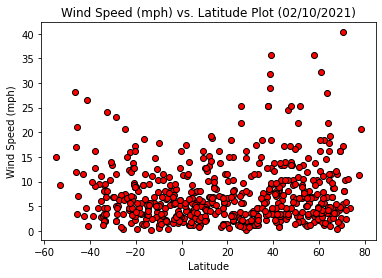

In [12]:
scatter_only(clean_cities_df['Latitude'], clean_cities_df['Wind Speed (mph)'])

#### This plot Latitude vs Wind Speed plot indicates that as you approach the south pole, the wind speed are mostly reduced down to zero.

## Linear Regression

In [13]:
# Create two Data Frames based on Northern and Southern Hemisphere
northern_hemisphere_cities_df = clean_cities_df[(clean_cities_df['Latitude'] >= 0)]
southern_hemisphere_cities_df = clean_cities_df[(clean_cities_df['Latitude'] < 0)]
left_align(southern_hemisphere_cities_df.head())

,City,Latitude,Longitude,Max Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Country,Date
2,Kismayo,-0.358200,42.545400,77.160000,81,80,16.200000,SO,1613017360
10,Serenje,-13.232500,30.235200,60.960000,96,100,0.200000,ZM,1613017361
11,Constitucion,-35.333300,-72.416700,61.740000,92,36,2.860000,CL,1613017361
14,Dores do indaia,-19.463300,-45.601700,65.430000,97,5,0.340000,BR,1613017361
15,Tautira,-17.733300,-149.150000,84.000000,65,75,5.750000,PF,1613017361


In [14]:
# Built in function to create scatter plot and linear regression
def scatter_linear(x_axis, y_axis, a, b):
    #First argument is x axis, second is y axis, third one is to determine color and fourth to determine hemisphere.
    
    # Import today's date
    today = dt.datetime.today().strftime('%m/%d/%Y')
    
    # Scatter Plot
    hemisphere = ['Northern Hemisphere ', 'Southern Hemisphere ']
    colors = ['lightblue', 'lightgreen']
    plt.scatter(x_axis, y_axis, marker="o", facecolors=colors[a], edgecolors="black")
    
    #plt.title(f"{hemisphere[b]} ({y_axis.name} vs. {x_axis.name} Linear Regression) ({today})") 
    
    main_title = f"{hemisphere[b]} ({y_axis.name} vs. {x_axis.name} Linear Regression) ({today})"
    image_title = (f"{hemisphere[b]} ({y_axis.name} vs {x_axis.name} Linear Regression)" + '.png')
    plt.title(main_title)
    plt.xlabel(x_axis.name)
    plt.ylabel(y_axis.name)

    # Linear Regression
    x = ((x_axis.mean())-5)
    y = y_axis.min()
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
    regress_values = x_axis * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.plot(x_axis,regress_values,"r-")
    plt.annotate(line_eq,(x,y),fontsize=15,color="red")
    print(f"The r-squared is: {rvalue**2}")
    
    #Save image in output_data directory
    my_dpi = 144
    plt.savefig(f"../output_data/{image_title}", bbox_inches = 'tight')

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7894378900815124


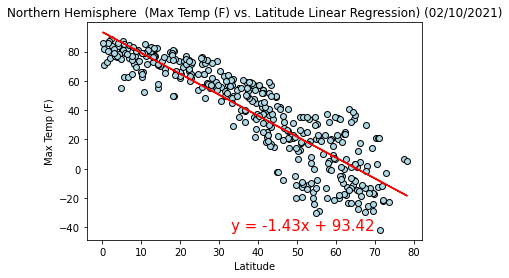

In [15]:
scatter_linear(northern_hemisphere_cities_df['Latitude'], northern_hemisphere_cities_df['Max Temp (F)'], 0, 0)

#### This linear regression is modeling the relationship between Northern Hemisphere Max Temp and Latitude. It shows that as we move North from the Equator temperatures decrease.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.22709734805459558


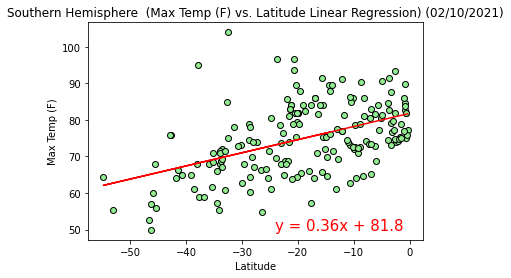

In [16]:
scatter_linear(southern_hemisphere_cities_df['Latitude'], southern_hemisphere_cities_df['Max Temp (F)'], 1, 1)

#### This linear regression is modeling the relationship between Southern Hemisphere Max Temp and Latitude. It shows that temperatures increase as we move closer to the Equator from South Pole.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.10477656186475698


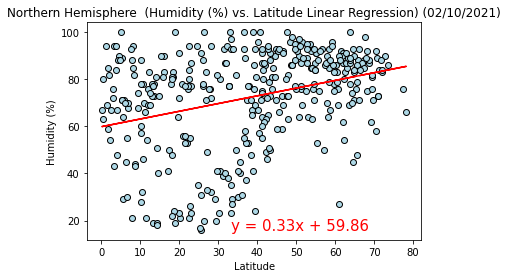

In [17]:
scatter_linear(northern_hemisphere_cities_df['Latitude'], northern_hemisphere_cities_df['Humidity (%)'], 0, 0)

#### This linear regression is modeling the relationship between Northern Hemisphere Humidity level and Latitude. It shows that Humidity levels tends to increase as we move north from the Equator. 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.035087470926107256


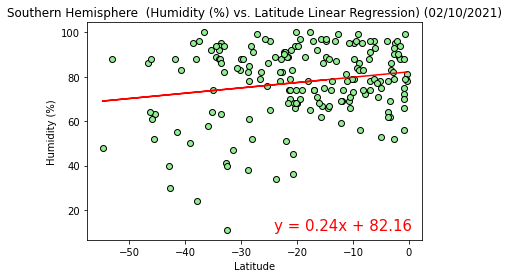

In [18]:
scatter_linear(southern_hemisphere_cities_df['Latitude'], southern_hemisphere_cities_df['Humidity (%)'], 1, 1)

#### This linear regression is modeling the relationship between Southern Hemisphere Humidity level and Latitude. It shows that Humidity levels tends to increase as we approach the Equator from the South Pole.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.02168950037387333


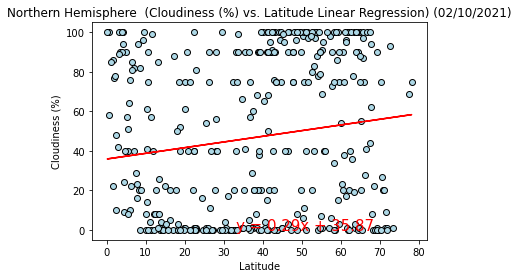

In [19]:
scatter_linear(northern_hemisphere_cities_df['Latitude'], northern_hemisphere_cities_df['Cloudiness (%)'], 0, 0)

#### This linear regression is modeling the relationship between Northern Hemisphere Cloudiness percentage and Latitude. It shows that Cloudiness tends to increase as we move north from the Equator.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.11217933313448303


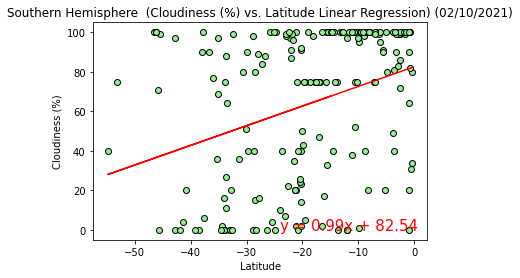

In [20]:
scatter_linear(southern_hemisphere_cities_df['Latitude'], southern_hemisphere_cities_df['Cloudiness (%)'], 1, 1)

#### This linear regression is modeling the relationship between Southern Hemisphere Cloudiness percentage and Latitude. It shows that Cloudiness tends to increase as we approach the equator from the South Pole.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.016375099245474888


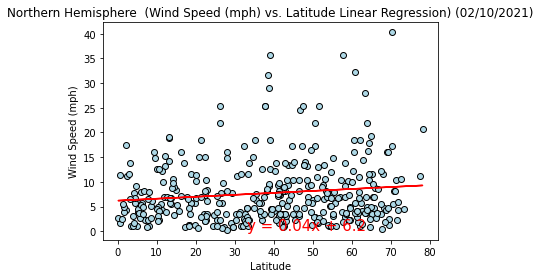

In [21]:
scatter_linear(northern_hemisphere_cities_df['Latitude'], northern_hemisphere_cities_df['Wind Speed (mph)'], 0, 0)

#### This linear regression is modeling the relationship between Northern Hemisphere Wind Speed and Latitude. It shows that Wind Speed tends to experience little to no increase as we move North from the Equator.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.09093513666424567


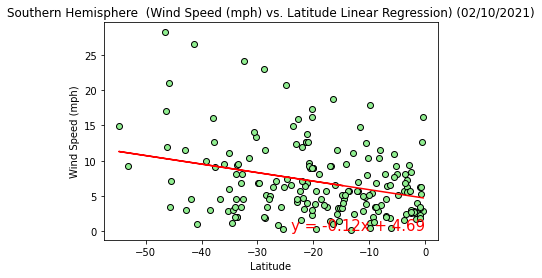

In [22]:
scatter_linear(southern_hemisphere_cities_df['Latitude'], southern_hemisphere_cities_df['Wind Speed (mph)'], 1, 1)

#### This linear regression is modeling the relationship between Southern Hemisphere Wind Speed and Latitude. It shows that Wind Speed tends to decrease as we approach the Equator from the South Pole.